<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_1_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Random Forest Example on MNIST data set**

#import necessary libraries and download the data from online repository

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load the full MNIST dataset (28x28 resolution = 784 features)
X, y = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True, parser='auto')

Fetching MNIST data... (this takes ~30 seconds)


#CREATE THE SUBSET: 2,000 samples, 784 features each

We use 'stratify' to ensure we get exactly ~200 of each digit (0-9)



In [ ]:

X_small, _, y_small, _ = train_test_split(X, y, train_size=2000, stratify=y, random_state=42)

#Preprocessing: Scale pixel values to [0, 1]


In [ ]:
X_small = X_small / 255.0

#Visualize samples from our subset


Visualizing 28x28 samples from your 2,000-image subset...


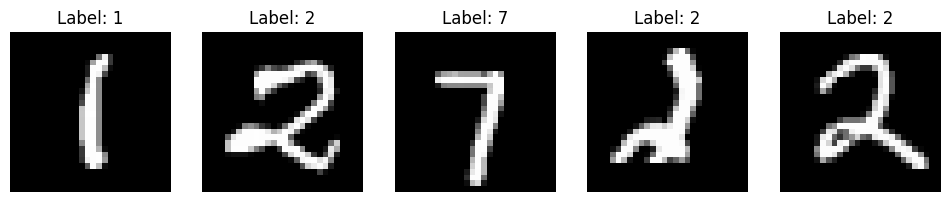

In [ ]:
print("Visualizing 28x28 samples from your 2,000-image subset...")
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(X_small[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y_small[i]}")
    axes[i].axis('off')
plt.show()

# Split subset into Training (80%) and Testing (20%)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42
)

#Train a Traditional ML Model (Random Forest)

In [ ]:

print(f"Training on {len(X_train)} images...")
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

Training on 1600 images...


RandomForestClassifier(n_jobs=-1, random_state=42)

#Evaluate our model on the test set

In [ ]:
print("\nResults on the 400-image test set:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Results on the 400-image test set:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       0.95      0.98      0.96        41
           2       0.85      0.87      0.86        39
           3       0.85      0.82      0.84        40
           4       0.97      0.90      0.94        41
           5       0.79      0.79      0.79        28
           6       0.90      0.88      0.89        43
           7       0.91      0.95      0.93        41
           8       0.90      0.90      0.90        42
           9       0.90      0.84      0.87        45

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400




#Plotting our confusion matrix. Please note that this is multi-class case

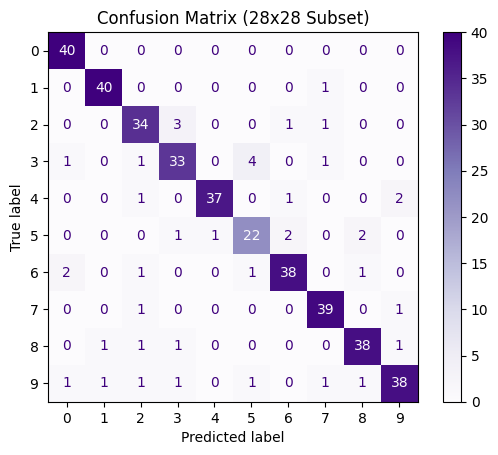

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')
plt.title("Confusion Matrix (28x28 Subset)")
plt.show()

Can you a similar training and test by using XGBOOST?

Please use the code block below to start with.

Please also provide the prediction report and the confusion display, too

In [ ]:
from xgboost import XGBClassifier
#please remember to cast your y labels to int by using astype(int)

